In [155]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

classes = {
    'neutral': 0,
    'happy': 1,
    'sad': 2,
    'surprised': 3,
    'fearful': 4,
    'disgusted': 5,
    'angry': 6,
    'contempt': 7,
    'none': 8,
    'uncertain': 9,
    'no-face': 10
}

In [156]:
def FER_2013_to_DataFrame(path_dataset, verbose=False):
    df = pd.DataFrame(columns=['path_img', 'class'])

    for file in os.listdir(path_dataset):
        if file.endswith('.csv'):
            path = path_dataset + file
            if verbose:
                print(f'----- Found a csv file -----')
            df = pd.read_csv(path)
            if verbose:
                print(f'----- Finished processing-----')
            return df

    for dir in os.listdir(path_dataset):
        if verbose:
            print(f'----- Processing directory {dir} -----')
        for class_dir in os.listdir(path_dataset + dir):
            if verbose:
                print(f'Getting data from the class {class_dir}...')
            for file in os.listdir(path_dataset + dir + '/' + class_dir):
                if file.endswith('.png'):
                    path = path_dataset + dir + '/' + class_dir + '/' + file
                    df = pd.concat([df, pd.DataFrame({'path_img': [path], 'class': [classes[class_dir]]})], ignore_index=True)

    df = df.sort_values(by=['class'], ascending=True)
    df = df.reset_index(drop=True)
    df.to_csv(path_dataset + 'fer2013.csv', index=False)
    if verbose:
        print(f'----- Finished processing csv saved in {path_dataset}fer2013.csv -----')
    return df

dir = './Datasets_processed/FER-2013/'
df_Fer2013 = FER_2013_to_DataFrame(dir, verbose=True)

----- Processing directory train -----
Getting data from the class angry...
Getting data from the class disgusted...
Getting data from the class fearful...
Getting data from the class happy...
Getting data from the class neutral...
Getting data from the class sad...
Getting data from the class surprised...
----- Processing directory test -----
Getting data from the class angry...
Getting data from the class disgusted...
Getting data from the class fearful...
Getting data from the class happy...
Getting data from the class neutral...
Getting data from the class sad...
Getting data from the class surprised...
----- Finished processing csv saved in ./Datasets_processed/FER-2013/fer2013.csv -----


In [147]:
def AffectNet_to_DataFrame(path_dataset, verbose=False):
    df = pd.DataFrame(columns=['path_img', 'class'])

    for file in os.listdir(path_dataset):
        if file.endswith('.csv'):
            path = path_dataset + file
            if verbose:
                print(f'----- Found a csv file -----')
            df = pd.read_csv(path)
            if verbose:
                print(f'----- Finished processing-----')
            return df
    
    for dir in os.listdir(path_dataset):
        if verbose:
                print(f'----- Processing directory {dir} -----')     
        if os.path.isdir(path_dataset + dir):
            for sub_dir in os.listdir(path_dataset + dir):
                if sub_dir == 'annotations':
                    for file in os.listdir(path_dataset + dir + '/' + sub_dir):
                        if file.endswith('exp.npy'):
                            path = path_dataset + dir + '/' + sub_dir + '/' + file
                            classe = np.load(path).tolist()[0]
                            image_number = file.split('_')[0]
                            image_path = path_dataset + dir + f'/images/{image_number}.jpg'
                            df = pd.concat([df, pd.DataFrame({'path_img': [image_path], 'class': [classe]})], ignore_index=True)
                            
    df = df.sort_values(by=['class'], ascending=True)
    df = df.reset_index(drop=True)
    df.to_csv(path_dataset + 'AffectNet.csv', index=False)
    if verbose:
        print(f'----- Finished processing csv saved in {path_dataset}AffectNet.csv -----')
    return df
        
df_AffectNet = AffectNet_to_DataFrame('./Datasets_processed/AffectNet/', verbose=True)

----- Found a csv file -----
----- Finished processing-----


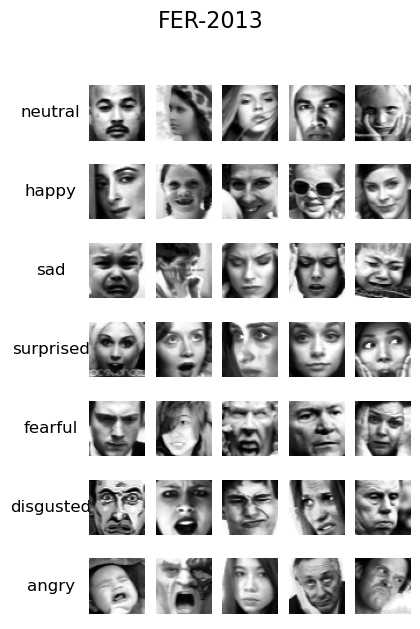

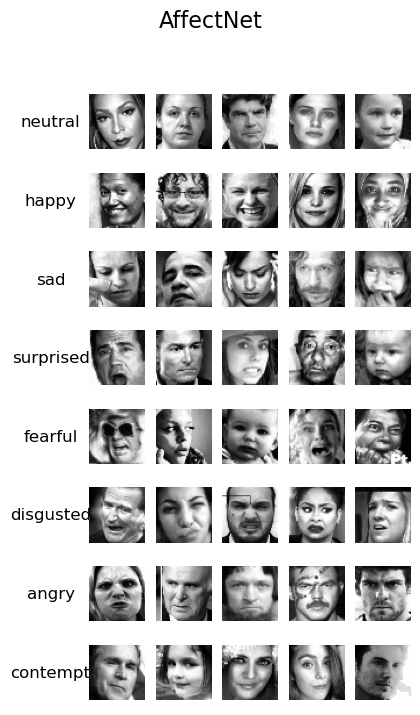

In [159]:
def display_dataframe(df, title, n_per_class=5):
    n_classes = max(df['class']) + 1
    fig, axs = plt.subplots(nrows=n_classes, ncols=n_per_class + 1, figsize=(n_per_class, n_classes))
    fig.suptitle(title, fontsize=16)
    for label in range(n_classes):
        name_label = list(classes.keys())[list(classes.values()).index(label)]
        axs[label, 0].text(0.5, 0.5, name_label, horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[label, 0].axis('off')
        for i in range(n_per_class):
            img = cv2.imread(df[df['class'] == label].iloc[i]['path_img'])
            axs[label, i+1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[label, i+1].axis('off')
    plt.show()

display_dataframe(df_Fer2013, 'FER-2013')
display_dataframe(df_AffectNet, 'AffectNet')